# Data import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# Import 2017,2018 and 2019 SAT Scores by State
sat_2017 = pd.read_csv('./data/sat_2017.csv')
sat_2018 = pd.read_csv('./data/sat_2018.csv')
sat_2019 = pd.read_csv('./data/sat_2019.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')
act_2019 = pd.read_csv('./data/act_2019.csv')

In [4]:
# Import US Region and divisions
region = pd.read_csv('./data/census_regions_and_divisions.csv')

# Data cleaning and formating

### SAT 2017

In [7]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
# Rename column and reset index
sat_2017.rename(columns={"State":"state", "Participation": "sat_participation","Evidence-Based Reading and Writing" : "sat_reading_writing","Math" : "sat_math","Total": 'sat_total'}, inplace=True)
sat_2017.sort_values(by = ['state'],inplace = True)
sat_2017.reset_index(drop=True)

# Add year column
sat_2017["year"] = "2017"
sat_2017 ["year"] = pd.to_datetime(sat_2017["year"]).dt.year

In [9]:
# Change data type of participation rate to float
sat_2017['sat_participation'] = sat_2017['sat_participation'].str.rstrip('%').astype('float') / 100.0

# Check the data type of participation rate
sat_2017['sat_participation'].dtype

dtype('float64')

In [10]:
sat_2017.head()

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year
0,Alabama,0.05,593,572,1165,2017
1,Alaska,0.38,547,533,1080,2017
2,Arizona,0.30,563,553,1116,2017
3,Arkansas,0.03,614,594,1208,2017
4,California,0.53,531,524,1055,2017


### SAT 2018

In [12]:
# Rename column and reset index
sat_2018.rename(columns={"State":"state", "Participation": "sat_participation","Evidence-Based Reading and Writing" : "sat_reading_writing","Math" : "sat_math",
                         "Total": 'sat_total'}, inplace=True)
sat_2018.sort_values(by = ['state'],inplace = True)
sat_2018.reset_index(drop=True)
# Add year column
sat_2018["year"] = "2018"
sat_2018 ["year"] = pd.to_datetime(sat_2018["year"]).dt.year

In [13]:
# Change data type of participation rate to float
sat_2018['sat_participation'] = sat_2018['sat_participation'].str.rstrip('%').astype('float') / 100.0
# Check the data type of participation rate
sat_2018['sat_participation'].dtype

dtype('float64')

In [14]:
sat_2018.head()

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year
0,Alabama,0.06,595,571,1166,2018
1,Alaska,0.43,562,544,1106,2018
2,Arizona,0.29,577,572,1149,2018
3,Arkansas,0.05,592,576,1169,2018
4,California,0.60,540,536,1076,2018


### SAT 2019

In [16]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [17]:
# Rename column and reset index
sat_2019.rename(columns={"State":"state", "Participation Rate": "sat_participation","EBRW" : "sat_reading_writing","Math" : "sat_math","Total": 'sat_total'}, inplace=True)
sat_2019.sort_values(by = ['state'],inplace = True)
sat_2019.reset_index(drop=True)
# Add year column
sat_2019 ["year"] = "2019"
sat_2019 ["year"] = pd.to_datetime(sat_2019["year"]).dt.year

In [18]:
# Replace '-' with NaN
sat_2019['sat_participation'] = sat_2019['sat_participation'].replace('—', np.nan)

In [19]:
# Change data type of participation rate to float
sat_2019['sat_participation'] = sat_2019['sat_participation'].str.rstrip('%').astype('float') / 100.0
# Check the data type of participation rate
sat_2019['sat_participation'].dtype

dtype('float64')

In [20]:
sat_2019.head()

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year
0,Alabama,0.07,583,560,1143,2019
1,Alaska,0.41,556,541,1097,2019
2,Arizona,0.31,569,565,1134,2019
3,Arkansas,0.06,582,559,1141,2019
4,California,0.63,534,531,1065,2019


### act_2017

In [22]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [23]:
# Rename column and reset index
act_2017.rename(columns={"State":"state", "Participation": "act_participation","English" : "act_english","Math" : "act_math","Reading" :"act_reading","Science":"act_science","Composite": 'act_total'}, inplace=True)
act_2017.drop(act_2017.index[0],inplace=True)
act_2017.sort_values(by = ['state'],inplace = True)
act_2017.reset_index(drop=True)

# Add year column
act_2017["year"] = "2017"
act_2017 ["year"] = pd.to_datetime(act_2017["year"]).dt.year

# Change data type of participation rate to float
act_2017['act_participation'] = act_2017['act_participation'].str.rstrip('%').astype('float') / 100.0
# Check the data type of participation rate
act_2017['act_participation'].dtype

dtype('float64')

In [24]:
act_2017.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_total,year
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,2017
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,2017
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,2017
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,2017
5,California,0.31,22.5,22.7,23.1,22.2,22.8,2017


### act_2018

In [26]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [27]:
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [28]:
# Rename column and reset index
act_2018.rename(columns={"State":"state", "Participation": "act_participation","Composite": 'act_total'}, inplace=True)
act_2018.sort_values(by = ['state'],inplace = True)
act_2018.reset_index(drop=True)

# Add year column
act_2018["year"] = "2018"
act_2018 ["year"] = pd.to_datetime(act_2018["year"]).dt.year

# Change data type of participation rate to float
act_2018['act_participation'] = act_2018['act_participation'].str.rstrip('%').astype('float') / 100.0
# Check the data type of participation rate
act_2018['act_participation'].dtype

dtype('float64')

In [29]:
act_2018

,state,act_participation,act_total,year
0,Alabama,1.00,19.1,2018
1,Alaska,0.33,20.8,2018
2,Arizona,0.66,19.2,2018
3,Arkansas,1.00,19.4,2018
4,California,0.27,22.7,2018
5,Colorado,0.30,23.9,2018
6,Connecticut,0.26,25.6,2018
7,Delaware,0.17,23.8,2018
8,District of columbia,0.32,23.6,2018
9,Florida,0.66,19.9,2018


### act_2019

In [31]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [32]:
act_2019

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6
5,Colorado,27%,23.8
6,Connecticut,22%,25.5
7,Delaware,13%,24.1
8,District of Columbia,32%,23.5
9,Florida,54%,20.1


In [33]:
# Rename column and reset index
act_2019.rename(columns={"State":"state", "Participation": "act_participation","Composite": 'act_total'}, inplace=True)
act_2019.drop(act_2019.index[51],inplace=True)
act_2019.sort_values(by = ['state'],inplace = True)
act_2019.reset_index(drop=True)

# Add year column
act_2019["year"] = "2019"
act_2019["year"] = pd.to_datetime(act_2019["year"]).dt.year

# Change data type of participation rate to float
act_2019['act_participation'] = act_2019['act_participation'].str.rstrip('%').astype('float') / 100.0
# Check the data type of participation rate
act_2019['act_participation'].dtype

dtype('float64')

In [34]:
act_2019.head()

,state,act_participation,act_total,year
0,Alabama,1.00,18.9,2019
1,Alaska,0.38,20.1,2019
2,Arizona,0.73,19.0,2019
3,Arkansas,1.00,19.3,2019
4,California,0.23,22.6,2019


### State name

In [36]:
# States in America
state_names = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

len(state_names)

51

In [37]:
# The number of the states of each years are unequal, I would like to check whether they are unique or not.
print(sat_2017['state'].str.lower().nunique())
print(sat_2018['state'].str.lower().nunique())
print(sat_2019['state'].str.lower().nunique())
print(act_2017['state'].str.lower().nunique())
print(act_2018['state'].str.lower().nunique())
print(act_2019['state'].str.lower().nunique())

51
51
53
51
51
51


In [38]:
print(sat_2017['state'].str.lower().nunique() == len(sat_2017))
print(sat_2018['state'].str.lower().nunique() == len(sat_2018))
print(sat_2019['state'].str.lower().nunique()== len(sat_2019))
print(act_2017['state'].str.lower().nunique()== len(act_2017))
print(act_2018['state'].str.lower().nunique()== len(act_2018))
print(act_2019['state'].str.lower().nunique()== len(act_2019))

True
True
True
True
False
True


In [39]:
# Check the state name of each year with state_names
print(list(sat_2017['state']) == state_names)
print(list(sat_2018['state']) == state_names)
print(list(sat_2019['state']) == state_names)
print(list(act_2017['state']) == state_names)
print(list(act_2018['state']) == state_names)
print(list(act_2019['state']) == state_names)

True
True
False
True
False
True


In [40]:
# Fix the sat_2019['State'])
list(set(sat_2019['state']) - set(state_names))
# Since ['Virgin Islands', 'Puerto Rico'] are considered as territory of the United States not state, these are dropped.

['Puerto Rico', 'Virgin Islands']

In [41]:
sat_2019.loc[sat_2019['state']== 'Puerto Rico']

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year
39,Puerto Rico,NaN,483,462,944,2019


In [42]:
sat_2019.drop(sat_2019.index[39],inplace=True)

In [43]:
sat_2019.loc[sat_2019['state']== 'Virgin Islands'] 

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year
47,Virgin Islands,NaN,490,445,935,2019


In [44]:
sat_2019.drop(sat_2019.index[46],inplace=True)

In [45]:
act_2018

,state,act_participation,act_total,year
0,Alabama,1.00,19.1,2018
1,Alaska,0.33,20.8,2018
2,Arizona,0.66,19.2,2018
3,Arkansas,1.00,19.4,2018
4,California,0.27,22.7,2018
5,Colorado,0.30,23.9,2018
6,Connecticut,0.26,25.6,2018
7,Delaware,0.17,23.8,2018
8,District of columbia,0.32,23.6,2018
9,Florida,0.66,19.9,2018


In [46]:
# Fix the act_2018['state'])
list(set(act_2018['state']) - set(state_names))

['District of columbia']

In [47]:
act_2018 = act_2018.replace(act_2018['state'][8], "District of Columbia")
act_2018.drop(act_2018.index[19],inplace=True)

In [48]:
# Check the state name of each year with state_names
print(list(sat_2017['state']) == state_names)
print(list(sat_2018['state']) == state_names)
print(list(sat_2019['state']) == state_names)
print(list(act_2017['state']) == state_names)
print(list(act_2018['state']) == state_names)
print(list(act_2019['state']) == state_names)

True
True
True
True
True
True


In [49]:
# rename the column
region.rename(columns={"State":"state", "State Code": "state_abbre","Region" : "region","Division" : "division"}, inplace=True)
region = region.sort_values(by = 'state', ascending = True).reset_index(drop=True)
region.head()

,state,state_abbre,region,division
0,Alabama,AL,South,East South Central
1,Alaska,AK,West,Pacific
2,Arizona,AZ,West,Mountain
3,Arkansas,AR,South,West South Central
4,California,CA,West,Pacific


In [50]:
# Add regional and division data 
sat_2017 = sat_2017.merge(region)
sat_2018 = sat_2018.merge(region)
sat_2019 = sat_2019.merge(region)
act_2017 = act_2017.merge(region)
act_2018 = act_2018.merge(region)
act_2019 = act_2019.merge(region)

In [51]:
# Concat all data
master = pd.concat([sat_2017,sat_2018,sat_2019,act_2017,act_2018,act_2019], axis=0)
master

,state,sat_participation,sat_reading_writing,sat_math,sat_total,year,state_abbre,region,division,act_participation,act_english,act_math,act_reading,act_science,act_total
0,Alabama,0.05,593.0,572.0,1165.0,2017,AL,South,East South Central,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,0.38,547.0,533.0,1080.0,2017,AK,West,Pacific,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,0.30,563.0,553.0,1116.0,2017,AZ,West,Mountain,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,0.03,614.0,594.0,1208.0,2017,AR,South,West South Central,NaN,NaN,NaN,NaN,NaN,NaN
4,California,0.53,531.0,524.0,1055.0,2017,CA,West,Pacific,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,NaN,NaN,NaN,NaN,2019,VA,South,South Atlantic,0.21,NaN,NaN,NaN,NaN,24.0
47,Washington,NaN,NaN,NaN,NaN,2019,WA,West,Pacific,0.24,NaN,NaN,NaN,NaN,22.1
48,West Virginia,NaN,NaN,NaN,NaN,2019,WV,South,South Atlantic,0.49,NaN,NaN,NaN,NaN,20.8
49,Wisconsin,NaN,NaN,NaN,NaN,2019,WI,Midwest,East North Central,1.00,NaN,NaN,NaN,NaN,20.3


# Explanatory Data Analysis

## Regional Comparisons

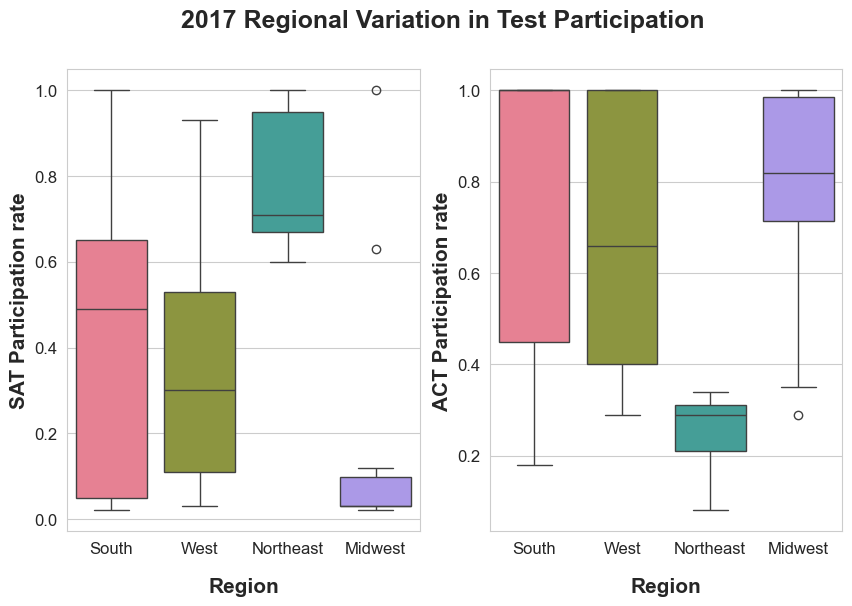

In [54]:
#### Participation rate 2017

participation_region_2017 = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'region', y = 'sat_participation', data = sat_2017, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('SAT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);


plt.subplot(1,2,2)
sns.boxplot(x = 'region', y = 'act_participation', data = act_2017, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('ACT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);

plt.suptitle('2017 Regional Variation in Test Participation', fontsize=18, fontweight="bold")
plt.savefig('2017 Regional Variation in Test Participation.png')

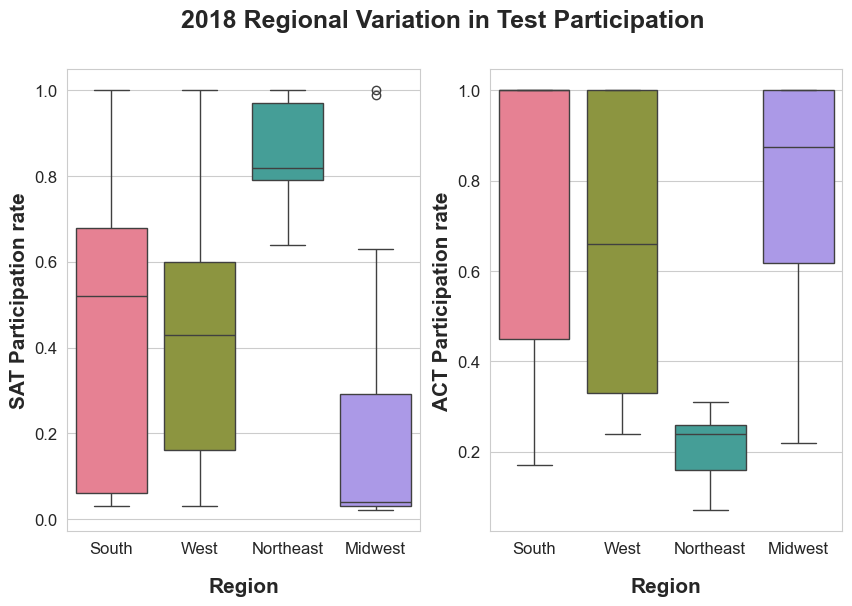

In [55]:
#### Participation rate 2018

participation_region_2018 = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'region', y = 'sat_participation', data = sat_2018, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('SAT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);


plt.subplot(1,2,2)
sns.boxplot(x = 'region', y = 'act_participation', data = act_2018, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('ACT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);

plt.suptitle('2018 Regional Variation in Test Participation', fontsize=18, fontweight="bold")
plt.savefig('2018 Regional Variation in Test Participation.png')

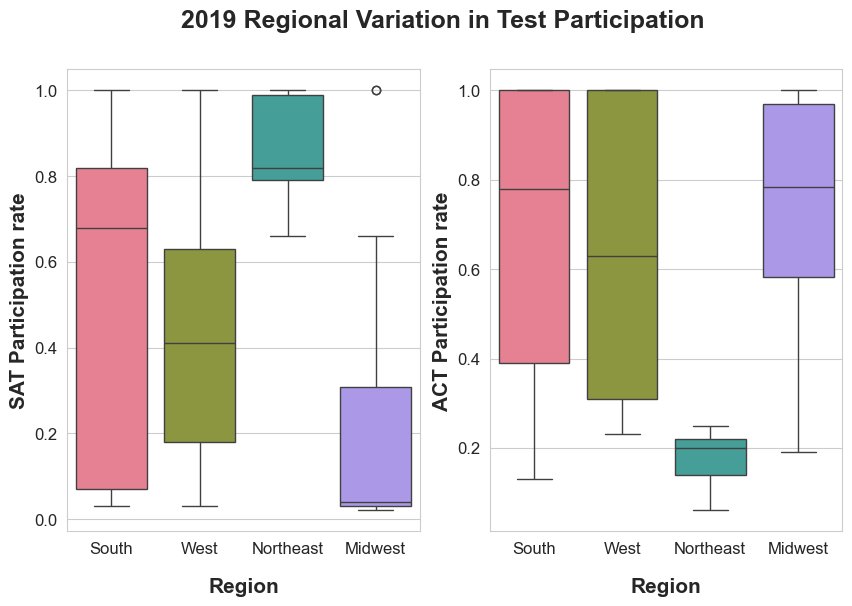

In [56]:
#### Participation rate 2019

participation_region_2019 = plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'region', y = 'sat_participation', data = sat_2019, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('SAT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);


plt.subplot(1,2,2)
sns.boxplot(x = 'region', y = 'act_participation', data = act_2019, hue = 'region', palette = 'husl');
plt.xlabel('Region', fontsize=15, fontweight="bold",labelpad=15)
plt.xticks(fontsize= 12) 
plt.ylabel('ACT Participation rate', fontsize=15, fontweight="bold")
plt.yticks(fontsize= 12);

plt.suptitle('2019 Regional Variation in Test Participation', fontsize=18, fontweight="bold")
plt.savefig('2019 Regional Variation in Test Participation.png')

# 2017

In [58]:
# Correlation
sat_act_2017 = sat_2017.merge(act_2017)
sat_act_2017_south = sat_act_2017[(sat_act_2017['region'] == 'South')].drop(['state','year', 'state_abbre', 'region', 'division'],axis=1)
sat_act_2017_west = sat_act_2017[(sat_act_2017['region'] == 'West')].drop(['state','year', 'state_abbre', 'region', 'division'],axis=1)
sat_act_2017_northeast = sat_act_2017[(sat_act_2017['region'] == 'Northeast')].drop(['state','year', 'state_abbre', 'region', 'division'],axis=1)
sat_act_2017_midwest = sat_act_2017[(sat_act_2017['region'] == 'Midwest')].drop(['state','year', 'state_abbre', 'region', 'division'],axis=1)

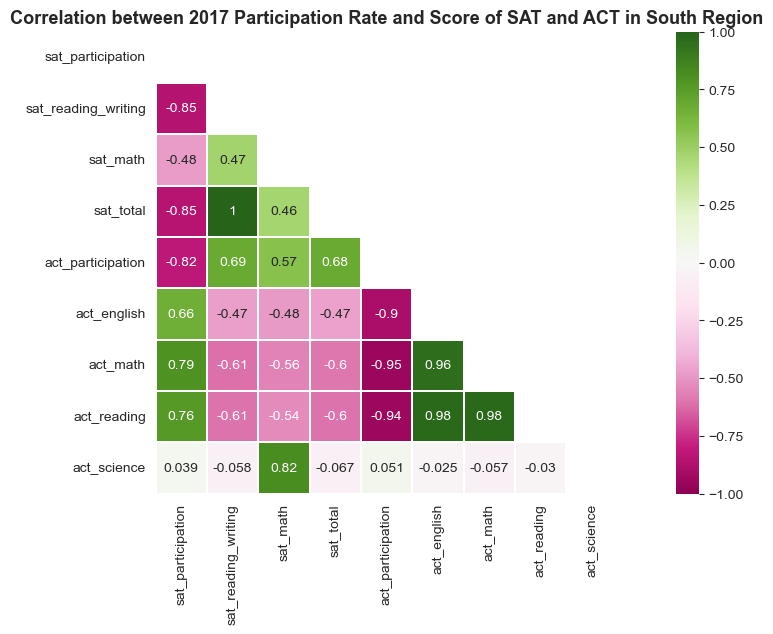

In [60]:
# South Heat map
plt.figure(figsize = (15,6))
corr_2017_south = sat_act_2017_south.corr(numeric_only=True)
mask1 = np.zeros_like(corr_2017_south)
mask1[np.triu_indices_from(mask1)] = True

with sns.axes_style("white"):
    sns.heatmap(corr_2017_south, cmap="PiYG",mask = mask1, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .1);

plt.title('Correlation between 2017 Participation Rate and Score of SAT and ACT in South Region', fontsize=13, fontweight="bold" );
plt.savefig('Correlation between 2017 Participation Rate and Score of SAT and ACT in South Region.png')

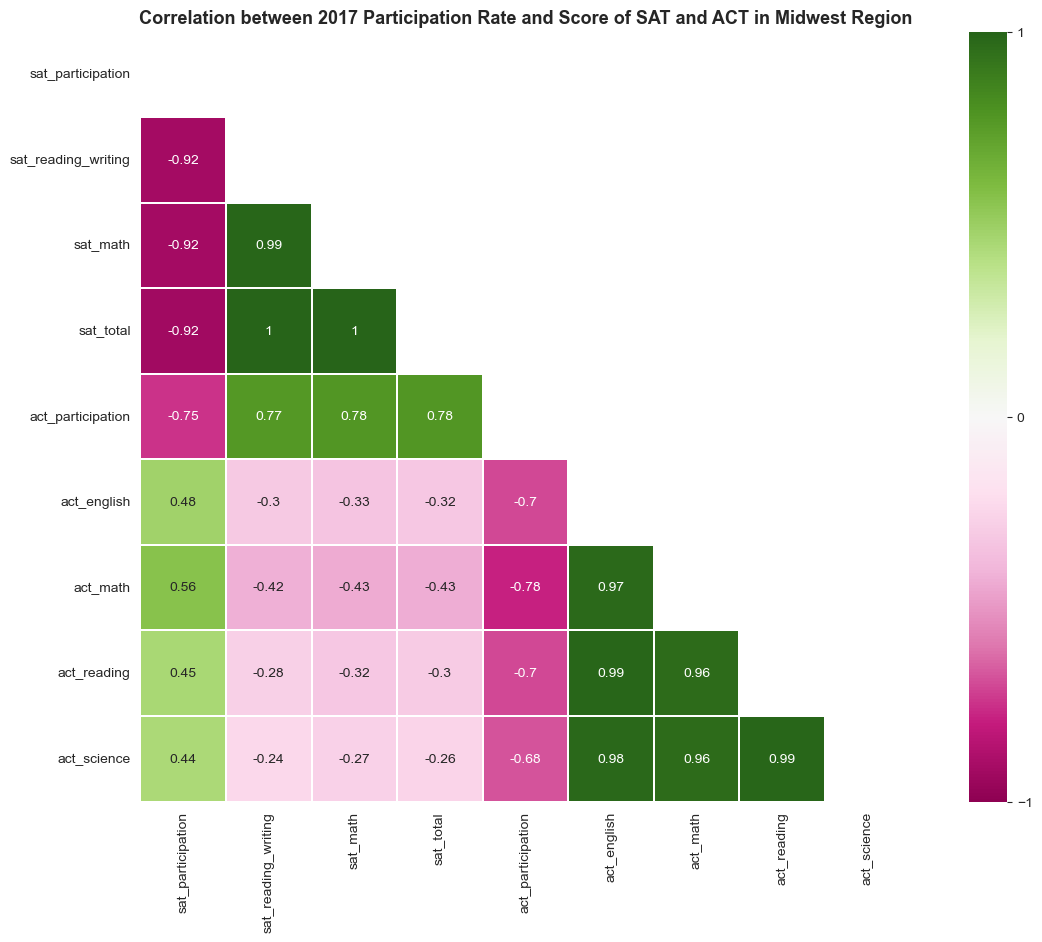

In [64]:
# West Heat map
plt.figure(figsize = (15,10))
corr_2017_west = sat_act_2017_west.corr(numeric_only=True)
mask2 = np.zeros_like(corr_2017_west)
mask2[np.triu_indices_from(mask2)] = True

with sns.axes_style("white"):
    sns.heatmap(corr_2017_west, cmap="PiYG",mask = mask2, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .1,cbar_kws={'ticks': [-1,0,1]});


plt.title('Correlation between 2017 Participation Rate and Score of SAT and ACT in Midwest Region', fontsize=13, fontweight="bold" );
plt.savefig('Correlation between 2017 Participation Rate and Score of SAT and ACT in Midwest Region.png')

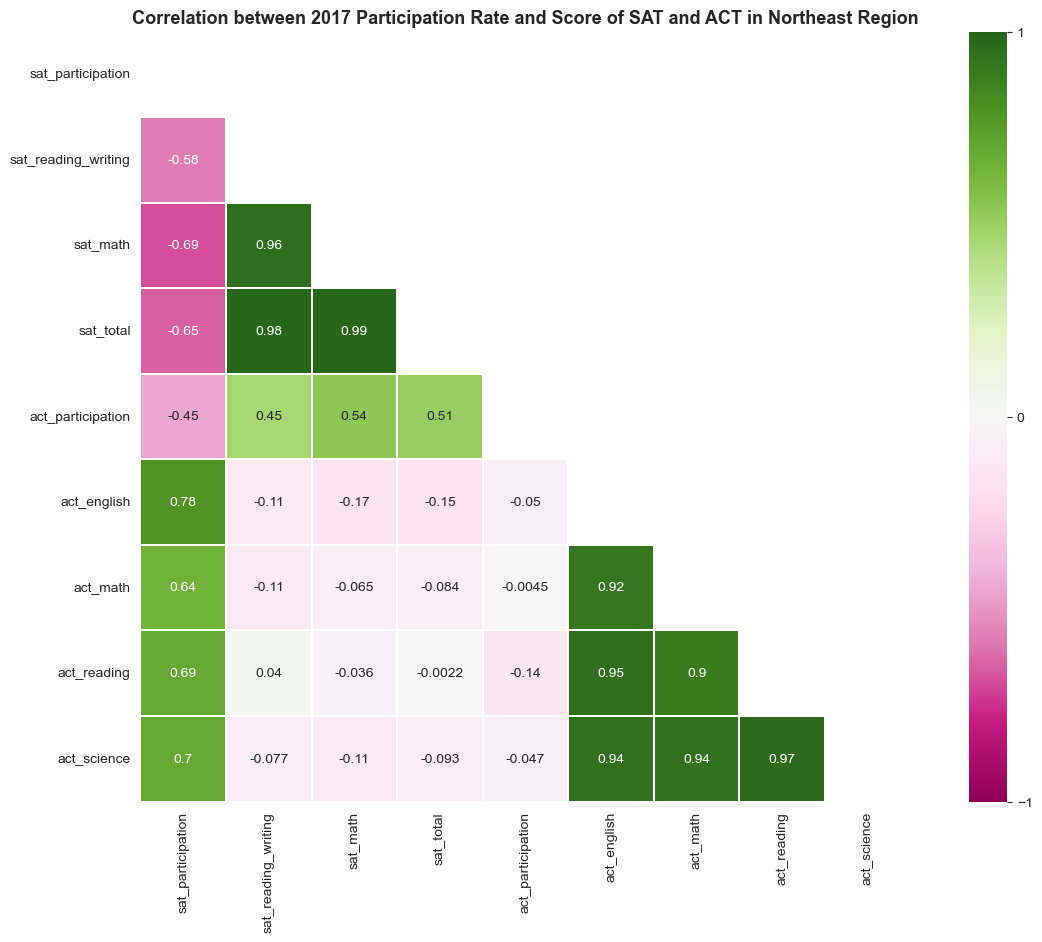

In [66]:
# South Heat map
plt.figure(figsize = (15,10))
corr_2017_northeast = sat_act_2017_northeast.corr(numeric_only=True)
mask3 = np.zeros_like(corr_2017_northeast)
mask3[np.triu_indices_from(mask3)] = True

with sns.axes_style("white"):
    sns.heatmap(corr_2017_northeast, cmap="PiYG",mask = mask3, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .1,cbar_kws={'ticks': [-1,0,1]});

plt.title('Correlation between 2017 Participation Rate and Score of SAT and ACT in Northeast Region', fontsize=13, fontweight="bold" );
plt.savefig('Correlation between 2017 Participation Rate and Score of SAT and ACT in Northeast Region')

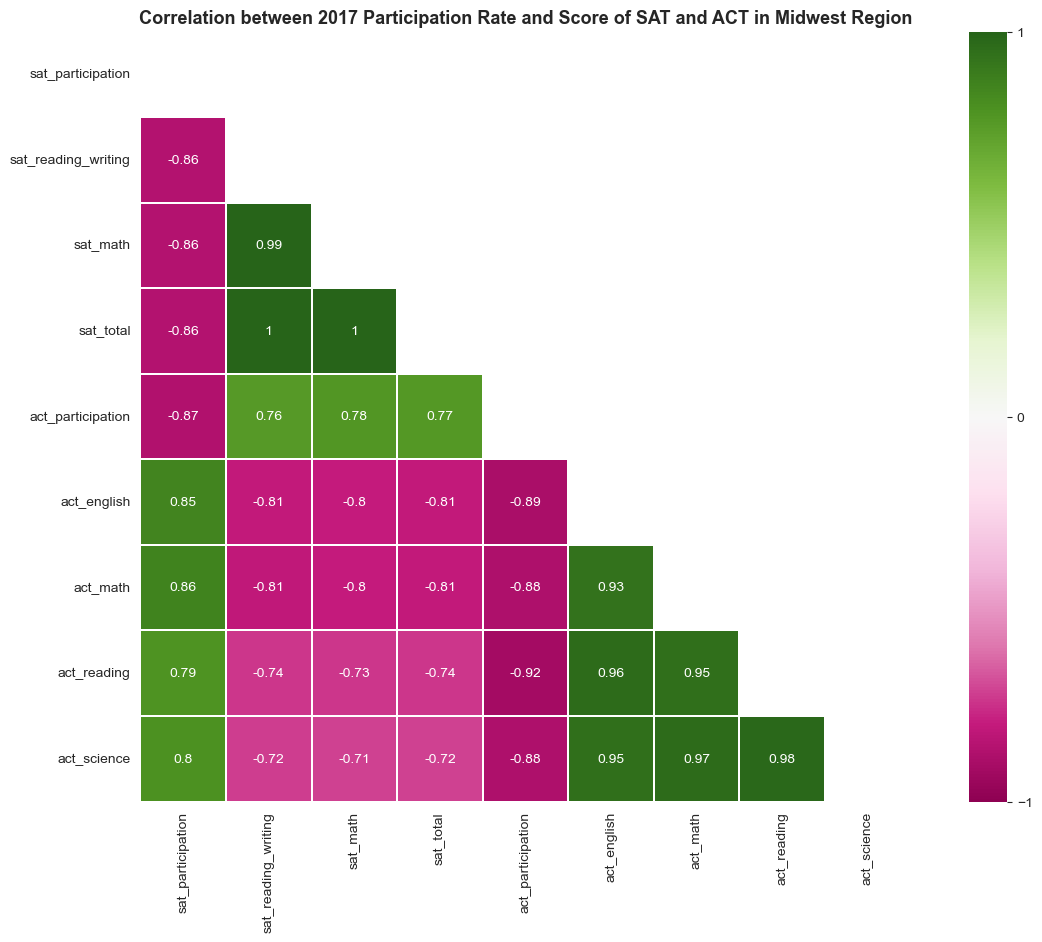

In [68]:
# Heat map
plt.figure(figsize = (15,10))
corr_2017_midwest = sat_act_2017_midwest.corr(numeric_only=True)
mask4 = np.zeros_like(corr_2017_midwest)
mask4[np.triu_indices_from(mask4)] = True

with sns.axes_style("white"):
    sns.heatmap(corr_2017_midwest, cmap="PiYG",mask = mask4, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .1,cbar_kws={'ticks': [-1,0,1]});

plt.title('Correlation between 2017 Participation Rate and Score of SAT and ACT in Midwest Region', fontsize=13, fontweight="bold" );
plt.savefig('Correlation between 2017 Participation Rate and Score of SAT and ACT in Midwest Region.png')